In [1]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv

# We'll use CPU because inference is inexpensive
ctx = mx.cpu()

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


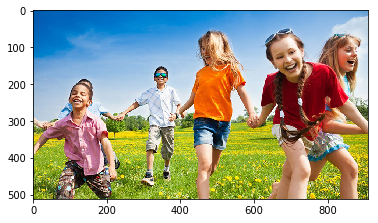

In [10]:
# Read a sample image and display it
img = image.imread("/home/ubuntu/kids.jpg")
img = mx.image.resize_short(img, 512)

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [11]:
# Normalize the image
transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])
img = transform_fn(img)
# Add batch dimension
img = img.expand_dims(0).as_in_context(ctx)

In [12]:
# Get pretrained VOC model
model = gluoncv.model_zoo.get_model('fcn_resnet50_voc', pretrained=True)

In [13]:
# Run the image through the network
output = model.evaluate(img)
# Get prediction for each pixel
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [14]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg

# Convert prediction to mask
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')

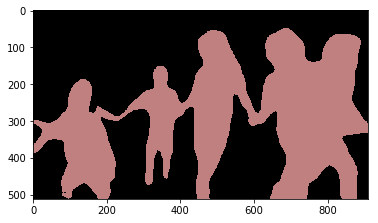

In [15]:
# Show mask
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

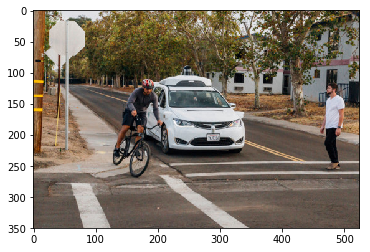

In [21]:
# Read a sample image and display it
img = image.imread("/home/ubuntu/road.jpg")

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

(350, 525, 3)


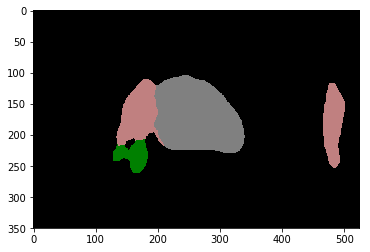

In [22]:
# Normalize the image
img = transform_fn(img)
# Add batch dimension
img = img.expand_dims(0).as_in_context(ctx)
# Run the image through the network
output = model.evaluate(img)
# Get prediction for each pixel
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
# Convert prediction to mask
mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output.png')
# Show mask
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()